In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from datetime import datetime

In [3]:
stat_df = pd.read_csv('data/statipy_results.csv')
stat_df.head()

,Unnamed: 0,Track,Explicit,Tpopularity,Artist,Album,Rdate
0,0,Paradise,False,49,Voyage,Paradise,2018-02-14
1,1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24
2,2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03
3,3,Night,False,39,John Carpenter,Lost Themes,2015-02-03
4,4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17


### First stat_df with datetime conversion

In [4]:
stat_df.head()

,Unnamed: 0,Track,Explicit,Tpopularity,Artist,Album,Rdate
0,0,Paradise,False,49,Voyage,Paradise,2018-02-14
1,1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24
2,2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03
3,3,Night,False,39,John Carpenter,Lost Themes,2015-02-03
4,4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17


In [5]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
Unnamed: 0     991 non-null int64
Track          991 non-null object
Explicit       991 non-null bool
Tpopularity    991 non-null int64
Artist         991 non-null object
Album          991 non-null object
Rdate          991 non-null object
dtypes: bool(1), int64(2), object(4)
memory usage: 47.5+ KB


In [7]:
stat_df['Rdate'] = pd.to_datetime(stat_df['Rdate'])

In [9]:
statipy_df = stat_df.drop('Unnamed: 0', axis=1)

In [207]:
statipy_df.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq
0,Paradise,False,49,Voyage,Paradise,2018-02-14,1,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03,1,1
3,Night,False,39,John Carpenter,Lost Themes,2015-02-03,1,1
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17,1,1


In [13]:
statipy_df['artsongcnt'] = statipy_df.groupby('Artist')['Track'].transform('count')
statipy_df['songfreq'] = statipy_df.groupby('Track')['Track'].transform('count')
statipycounts_df = statipy_df[statipy_df['songfreq']>=2]
statipycounts_df.head()

In [16]:
art_dategroup = statipy_df.groupby(['Artist', 'Rdate'])[['Tpopularity', 'artsongcnt', 'songfreq', 'Explicit']]
art_dategroup.groups

### Creates STATIDATE_I DF with datetime index

In [10]:
statidate_i = stat_df.drop('Unnamed: 0', axis=1)

In [11]:
statidate_i['Rdate']= pd.DatetimeIndex(statidate_i['Rdate'], freq='infer')

In [12]:
statidate_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 6 columns):
Track          991 non-null object
Explicit       991 non-null bool
Tpopularity    991 non-null int64
Artist         991 non-null object
Album          991 non-null object
Rdate          991 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 39.8+ KB


In [20]:
statidate_i['artsongcnt'] = statidate_i.groupby('Artist')['Track'].transform('count')

In [21]:
statidate_i['songfreq'] = statidate_i.groupby('Track')['Track'].transform('count')

In [22]:
statidate_i

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq
0,Paradise,False,49,Voyage,Paradise,2018-02-14,1,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03,1,1
3,Night,False,39,John Carpenter,Lost Themes,2015-02-03,1,1
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17,1,1
5,Wat U Mean,True,42,Lizzo,Lizzobangers,2014-05-20,13,2
6,Sissy That Walk,False,67,RuPaul,Born Naked,2014-02-24,88,2
7,Level Ya Pussy Up,False,49,Aja,Level Ya Pussy Up,2017-02-02,5,1
8,Pose,False,55,Naomi Smalls,Pose,2018-12-27,1,1
9,Bring It! - Tim Letteer Radio Edit,False,26,Manila Luzon,"Bring It!, Remixes, Pt. 1",2014-01-17,2,1


#### - statidate_i entire playlist - plus all freq columns add here:

In [23]:
statidate_i['datefreq'] = statidate_i.groupby('Rdate')['Track'].transform('count')

In [24]:
statidate_i

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,datefreq
0,Paradise,False,49,Voyage,Paradise,2018-02-14,1,1,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24,1,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03,1,1,2
3,Night,False,39,John Carpenter,Lost Themes,2015-02-03,1,1,2
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17,1,1,1
5,Wat U Mean,True,42,Lizzo,Lizzobangers,2014-05-20,13,2,3
6,Sissy That Walk,False,67,RuPaul,Born Naked,2014-02-24,88,2,14
7,Level Ya Pussy Up,False,49,Aja,Level Ya Pussy Up,2017-02-02,5,1,1
8,Pose,False,55,Naomi Smalls,Pose,2018-12-27,1,1,1
9,Bring It! - Tim Letteer Radio Edit,False,26,Manila Luzon,"Bring It!, Remixes, Pt. 1",2014-01-17,2,1,1


#### tracks featured more than 3, 2, 1

In [30]:
tr3 = statidate_i[statidate_i['songfreq']>=3]
tr3
tr2 = statidate_i[statidate_i['songfreq']==2]
tr2
tr1 = statidate_i[statidate_i['songfreq']<=1]
tr1

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,datefreq
43,Glamazon,False,57,RuPaul,Glamazon,2011-05-03,88,3,4
129,Adrenaline (feat. Myah Marie),False,60,RuPaul,Born Naked,2014-02-24,88,3,14
130,Dem Beats,True,59,Todrick Hall,Forbidden,2018-03-27,4,3,3
132,Adrenaline (feat. Myah Marie),False,60,RuPaul,Born Naked,2014-02-24,88,3,14
133,Glamazon,False,57,RuPaul,Glamazon,2011-05-03,88,3,4
157,"Shake, Rattle And Roll",False,51,Big Joe Turner,Shake Rattle & Rock,2007-10-30,4,3,4
194,"Shake, Rattle And Roll",False,51,Big Joe Turner,Shake Rattle & Rock,2007-10-30,4,3,4
218,Adrenaline (feat. Myah Marie),False,60,RuPaul,Born Naked,2014-02-24,88,3,14
228,Glamazon,False,43,RuPaul,"Essential, Vol. 2",2017-06-09,88,3,20
277,Dem Beats,True,59,Todrick Hall,Forbidden,2018-03-27,4,3,3


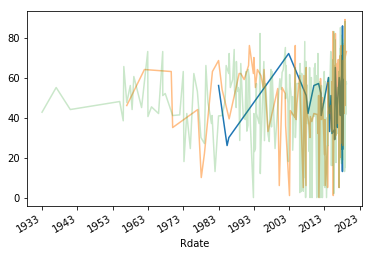

In [37]:
tr3.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=1)
tr2.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=0.50)
tr1.groupby(['Rdate'])['Tpopularity'].mean().plot.line(stacked=True, alpha=0.25)

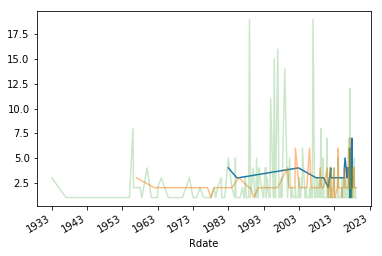

In [18]:
tr3.groupby(['Rdate'])['Explicit'].count().plot.line(stacked=True, alpha=1)
tr2.groupby(['Rdate'])['Explicit'].count().plot.line(stacked=True, alpha=0.50)
tr1.groupby(['Rdate'])['Explicit'].count().plot.line(stacked=True, alpha=0.25)

In [51]:
art_desc = statidate_i.groupby(['Artist', 'Rdate', 'Explicit'])
art_desc.mean()

,,,Tpopularity,artsongcnt,songfreq,datefreq
Artist,Rdate,Explicit,,,,
!!!,2017-03-22,False,38.000000,2.0,2.000000,2.0
2Pac,2014-11-07,True,43.000000,1.0,1.000000,4.0
Aaron Copland,1960-01-01,False,50.000000,1.0,1.000000,4.0
Adam Joseph,2017-05-03,False,40.000000,1.0,1.000000,1.0
Adore Delano,2014-06-03,True,49.000000,1.0,1.000000,1.0
Adrianne Lenker,2018-10-05,False,58.000000,1.0,1.000000,2.0
Agnes Obel,2013-01-01,False,53.000000,1.0,1.000000,8.0
Ah-Mer-Ah-Su,2017-02-26,False,5.000000,2.0,2.000000,2.0
Aja,2017-02-02,False,49.000000,5.0,1.000000,1.0


In [25]:
art_dategroupi = statidate_i.groupby(['Artist', 'Rdate'])
art_dategroupi
art_dategroupi.mean()

In [66]:
art_dategroupi.head()

,Track,Explicit,Tpopularity,Artist,Album,Rdate,artsongcnt,songfreq,datefreq
0,Paradise,False,49,Voyage,Paradise,2018-02-14,1,1,1
1,Tech Noir,False,56,Gunship,GUNSHIP,2015-07-24,1,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,Yes (Love Theme From Lost River),2015-02-03,1,1,2
3,Night,False,39,John Carpenter,Lost Themes,2015-02-03,1,1,2
4,Depth Charge,False,5,Flume,Skin Companion EP II,2017-02-17,1,1,1
5,Wat U Mean,True,42,Lizzo,Lizzobangers,2014-05-20,13,2,3
6,Sissy That Walk,False,67,RuPaul,Born Naked,2014-02-24,88,2,14
7,Level Ya Pussy Up,False,49,Aja,Level Ya Pussy Up,2017-02-02,5,1,1
8,Pose,False,55,Naomi Smalls,Pose,2018-12-27,1,1,1
9,Bring It! - Tim Letteer Radio Edit,False,26,Manila Luzon,"Bring It!, Remixes, Pt. 1",2014-01-17,2,1,1


In [78]:
art_dategroupi[['datefreq']].describe()

datefreq                                   
                                      count mean  std  min  25%  50%  75%  max
Artist                  Rdate                                                 
!!!                     2017-03-22      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
2Pac                    2014-11-07      1.0  4.0  NaN  4.0  4.0  4.0  4.0  4.0
Aaron Copland           1960-01-01      1.0  4.0  NaN  4.0  4.0  4.0  4.0  4.0
Adam Joseph             2017-05-03      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Adore Delano            2014-06-03      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Adrianne Lenker         2018-10-05      1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0
Agnes Obel              2013-01-01      1.0  8.0  NaN  8.0  8.0  8.0  8.0  8.0
Ah-Mer-Ah-Su            2017-02-26      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
Aja                     2017-02-02      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2017-04-21      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2018-03-01      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2018-05-07      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2018-10-17      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Al B. Sure!             1988-04-26      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Alabama Shakes          2012-01-01      1.0  9.0  NaN  9.0  9.0  9.0  9.0  9.0
                        2015-04-21      3.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
Alaska Thunderfuck      2015-06-23      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
                        2016-10-14      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
Alban Berg              2012-01-01      1.0  9.0  NaN  9.0  9.0  9.0  9.0  9.0
Alice Cooper            1972-01-01      1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0
Allen Toussaint         1975-01-01      1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0
Amadou & Mariam         2008-11-17      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
Amara La Negra          2018-02-20      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Angel Haze              2012-01-01      4.0  9.0  0.0  9.0  9.0  9.0  9.0  9.0
Angel Olsen             2016-09-02      1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0
Anita O'Day             1941-01-01      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        1955-01-01      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        1961-03-14      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2015-02-12      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Antonio Vivaldi         2014-01-01      1.0  7.0  NaN  7.0  7.0  7.0  7.0  7.0
...                                     ...  ...  ...  ...  ...  ...  ...  ...
Whitney Houston         2006-05-02      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Wilbert Harrison        2007-10-09      2.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
Willam                  2013-04-18      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2015-06-02      1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0
Willie Mitchell         2014-01-01      1.0  7.0  NaN  7.0  7.0  7.0  7.0  7.0
Willow                  2010-10-26      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Wilson Pickett          1966-01-01      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2017-11-24      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
Wolfgang Amadeus Mozart 1995-11-01      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2004-01-01      1.0  6.0  NaN  6.0  6.0  6.0  6.0  6.0
                        2006-06-05      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
                        2011-02-08      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
Wynona Carr             1993-01-01      1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0
Wynonie Harris          2014-04-19      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
XXXTENTACION            2018-10-25      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
Yeah Yeah Yeahs         2002-01-01      2.0  8.0  0.0  8.0  8.0  8.0  8.0  8.0
                        2003-04-29      2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
      

In [107]:
freqdates = statidate_i[statidate_i['datefreq']>=8]
maxfreqdates = statidate_i[statidate_i['datefreq']>=15]
minfreqdates = statidate_i[statidate_i['datefreq']==1]

In [110]:
date_i = freqdates.groupby(['Rdate'])[['Explicit', 'Tpopularity', 'datefreq']].mean()
date_max = maxfreqdates.groupby(['Rdate'])[['Explicit', 'Tpopularity', 'datefreq']].mean()
date_max

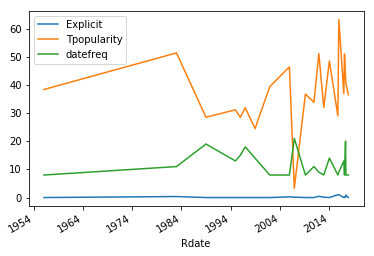

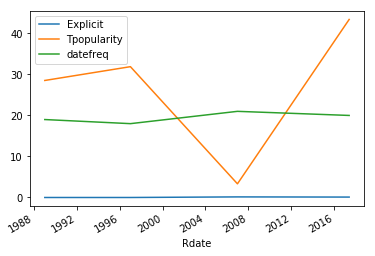

In [118]:
date_i.plot()
date_max.plot()

In [ ]:
minfreqdates['Rdate'] = pd.DatetimeIndex(minfreqdates['Rdate']).year

In [95]:
alldates_i = statidate_i[['Track', 'Explicit', 'Tpopularity', 'Artist', 'Rdate', 'artsongcnt', 'songfreq', 'datefreq']]
alldates_i.head()

,Track,Explicit,Tpopularity,Artist,Rdate,artsongcnt,songfreq,datefreq
0,Paradise,False,49,Voyage,2018-02-14,1,1,1
1,Tech Noir,False,56,Gunship,2015-07-24,1,1,1
2,Yes (Symmetry Remix),False,38,Chromatics,2015-02-03,1,1,2
3,Night,False,39,John Carpenter,2015-02-03,1,1,2
4,Depth Charge,False,5,Flume,2017-02-17,1,1,1


In [96]:
alldates_i['Rdate'] = pd.DatetimeIndex(alldates_i['Rdate']).year

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


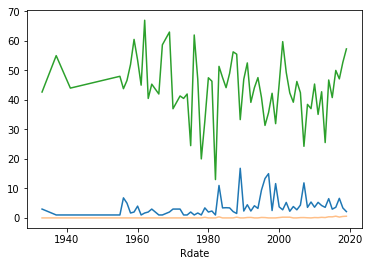

In [115]:
alldates_i.groupby('Rdate')['datefreq'].mean().plot.line(stacked=True)
alldates_i.groupby('Rdate')['Explicit'].mean().plot.line(stacked=True, alpha=2.5)
alldates_i.groupby('Rdate')['Tpopularity'].mean().plot.line(stacked=True)

In [119]:
mindate = alldates_i[alldates_i['datefreq']==1]
mindate

,Track,Explicit,Tpopularity,Artist,Rdate,artsongcnt,songfreq,datefreq
0,Paradise,False,49,Voyage,2018,1,1,1
1,Tech Noir,False,56,Gunship,2015,1,1,1
4,Depth Charge,False,5,Flume,2017,1,1,1
7,Level Ya Pussy Up,False,49,Aja,2017,5,1,1
8,Pose,False,55,Naomi Smalls,2018,1,1,1
9,Bring It! - Tim Letteer Radio Edit,False,26,Manila Luzon,2014,2,1,1
14,Demons Witches & Bitches,True,37,Aja,2018,5,1,1
15,Are You Still Certain? (feat. Mashrou' Leila),False,39,Hercules & Love Affair,2017,3,1,1
18,Interweb,False,44,Poppy,2017,1,1,1
22,C.L.A.T. (feat. DJ Mitch Ferrino),True,47,Aja,2017,5,1,1


In [120]:
date_min = mindate.groupby(['Rdate'])[['Explicit', 'Tpopularity', 'datefreq']].mean()
len(date_min)

50

In [121]:
date_min['Tpopularity'].describe()

count    50.000000
mean     47.130958
std      14.042714
min       0.000000
25%      42.000000
50%      46.750000
75%      55.375000
max      73.000000
Name: Tpopularity, dtype: float64

In [122]:
toppop_datemin = mindate[mindate['Tpopularity']>=64]
len(toppop_datemin)

29

In [124]:
lowpop_datemin = mindate[mindate['Tpopularity']<=17]
len(lowpop_datemin)

29

In [136]:
toppop_datemin['Rdate']

201    2011
205    1967
208    2006
333    1991
390    1995
392    2002
395    2001
420    2007
422    2010
477    2018
516    2015
525    2008
556    2018
593    1962
616    1988
646    2017
675    2015
714    2017
739    1979
741    2014
742    1985
755    1987
756    1994
818    1995
908    2007
954    2014
956    2010
964    2001
982    2015
Name: Rdate, dtype: int64

In [159]:
tpdm = toppop_datemin
lpdm = lowpop_datemin

In [184]:
lpdm.groupby('Rdate')['Explicit'].count()

Rdate
1978    1
1982    1
1992    1
1994    1
2006    1
2007    2
2008    2
2010    2
2011    5
2012    2
2013    4
2014    1
2015    2
2017    2
2018    2
Name: Explicit, dtype: int64

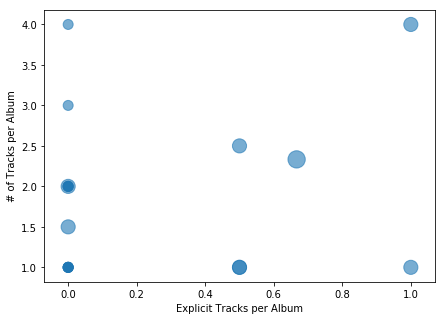

In [189]:
x = tpdm.groupby('Rdate')['Explicit'].mean()
y = tpdm.groupby('Rdate')['artsongcnt'].mean()
s = tpdm.groupby('Rdate')['Explicit'].count()

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x, y, s*100, alpha=0.60);
ax.set_xlabel('Explicit Tracks per Album')
ax.set_ylabel('# of Tracks per Album')

plt.show()

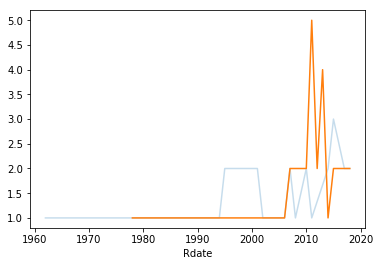

In [197]:
tpdm.groupby('Rdate')['datefreq'].count().plot.line(stacked=True, alpha=.25)
lpdm.groupby('Rdate')['datefreq'].count().plot.line(stacked=True)

In [127]:
d1 = pd.DataFrame()

In [ ]:
d1['Rdate']